# **IS THIS MUSHROOM EDIBLE? FUNGUS CLASSIFICATION**

*The project, like the rest of the repository, was written with the idea of ​​learning DataScience from scratch - this one is focused on the ML aspect.*

The aim of the project is to study the [Mushroom Classification](https://www.kaggle.com/uciml/mushroom-classification) dataset and to create a model for mushroom classification. The fact that I absolutely love mushroom picking is the motivation and inspiration to undertake this task. In order to achieve the goal, the notebook has been divided into several segments:

O. Overview of the dataset

A. Data import, viewing and cleaning

B. Data Research

C. Preparation of data for classification

D. Creation of models

E. Conclusions and evaluation of results

> Modules used:

* pandas and numpy - basics of data processing modules (data manipulation and analysis; support for large, multidimensional tables and matrices)
* scikit-learn - data encoding and machine learning models
* matplotlib.plot and plotly - data visualization tools
theoretical basis of decision tree structures and Random Forest

#O. Overview of the dataset
This dataset contains a description of hypothetical mushroom samples corresponding to 23 species of the Agaricus and Lepiota family on the basis of the [guide](https://books.google.pl/books/about/The_Audubon_Society_Field_Guide_to_North.html?id=bf8UAQAAIAAJ&redir_esc=y) from 1981. Each species is recognized as unambiguously poisonous or edible, but the first group includes ambiguous mushrooms, e.g. non-toxic but also bad for humans. According to the guide, there is no clear rule that determines the virulence of a given mushroom, will ML methods confirm it?

The dataset describes the following mushroom characteristics:

#A. Data import, viewing and cleaning

## Modules and downloads

In [ ]:
#upgrade plotly
!pip install --upgrade plotly

In [ ]:
#import necessery modules
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
#copy the repository
!git clone https://github.com/DedricWaler/MachineLearning_PL/

fatal: destination path 'MachineLearning_PL' already exists and is not an empty directory.


In [ ]:
#unpack imported data
import shutil

shutil.unpack_archive("/content/MachineLearning_PL/ML_Projects/Mushroom_Classification/mush_data.zip")

In [ ]:
mush_df = pd.read_csv('mushrooms.csv')


##Data overview

Let's get some inside inside the data e.g. shape of dataset, first rows of mush_df.

In [ ]:
mush_df.shape

(8124, 23)

In [ ]:
mush_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
#lets check data types and lengths of each column 
mush_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

First, we create dictionary to translate categorical values

Then, we can creat function to apply it to database columns

In [1]:
trans_dict = {'cap_shape': {'b': 'bell','c': 'conical' , 'x': 'convex','f': 'flat', 'k': 'knobbed', 's': 'sunken'},
              'cap_surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
              'cap_color': {'n': 'brown','b': 'buff','c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
              'bruises': {'t': 'bruises', 'f': 'no bruises'},
              'odor': {'a': 'almond','l': 'anise', 'c': 'creosote', 'y': 'fishy','f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
              'edible': {'e': 'edible', 'p' : 'poisonous'},
              'gill_attachment': {'a': 'attached', 'd': 'descending','f': 'free','n': 'notched'},
              'gill_spacing' : {'c': 'close', 'w': 'crowded', 'd': 'distant'},
              'gill_size' : {'b': 'broad', 'n': 'narrow'},
              'gill_color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
              'stalk_shape': {'e': 'enlarging', 't': 'tapering'},
              'stalk_root' : {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
              'stalk_surface_above_ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
              'stalk_surface_below_ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
              'stalk_color_above_ring': {'n': 'brown','b': 'buff','c': 'cinnamon','g': 'gray','o': 'orange','p': 'pink','e': 'red','w': 'white', 'y': 'yellow'},
              'stalk_color_below_ring': {'n': 'brown','b': 'buff','c': 'cinnamon','g': 'gray','o': 'orange','p': 'pink','e': 'red','w': 'white', 'y': 'yellow'},
              'veil_type': {'p': 'partial', 'u': 'universal'},
              'veil_color': {'n': 'brown', 'o':'orange','w': 'white', 'y':'yellow'},
              'ring_number': {'n': 'none', 't':'two', 'o': 'one'},
              'ring_type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flarring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheating', 'z': 'zone'},
              'spore_print_color': {'k': 'black','n' :'brown','b': 'buff','h': 'chocolate','r': 'green','o': 'orange','u' :'purple','w': 'white','y': 'yellow'},
              'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
              'habitat': {'g': 'grasses','l': 'leaves','m': 'meadows','p': 'paths','u': 'urban','w': 'waste','d': 'woods'}
              }

#function renaming all columns and values
def rename_col_val(room_df, trans_dict):
  room_df = room_df.set_axis([str.replace('-','_') for str in list(room_df.columns)], axis= 1)
  room_df = room_df.rename(columns= {'class' : 'edible'})
  try:
    for col in room_df.columns:
      room_df[col] = room_df[col].apply(lambda x: trans_dict[col][x])
  except:
    pass #prevent errors from popping when running second time in same session 
  return room_df

In [ ]:
mush_df = rename_col_val(mush_df, trans_dict)

In [ ]:
#check for missing values
mush_df.isnull().sum()

edible                      0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
#print values defining every variable
def print_unique_values(df):
  for col in df.columns:
    print(f'-> {col}({len(df[col].unique())}):  {df[col].unique()}')
    print(f'{df[col].value_counts()}\n'),

print_unique_values(mush_df)

-> edible(2):  ['poisonous' 'edible']
edible       4208
poisonous    3916
Name: edible, dtype: int64

-> cap_shape(6):  ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: cap_shape, dtype: int64

-> cap_surface(4):  ['smooth' 'scaly' 'fibrous' 'grooves']
scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: cap_surface, dtype: int64

-> cap_color(10):  ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
green         16
purple        16
Name: cap_color, dtype: int64

-> bruises(2):  ['bruises' 'no bruises']
no bruises    4748
bruises       3376
Name: bruises, dtype: int64

-> odor(9):  ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
none        3528
foul        2160
fishy 

#B. Data Research

## Plots of edibility

Let's create data ploting tamplate


In [ ]:
#bar plot template
import plotly.graph_objects as go

#for edible highliting
def barplot_edible(df, col1):
  fig = go.Figure()
  fig.add_trace(go.Histogram(
      x = df[col1][df.edible == 'edible'],
      name = 'edible',
      marker_color = 'forestgreen',
      opacity = 0.8,
  ))
  fig.add_trace(go.Histogram(
      x = df[col1][df.edible == 'poisonous'],
      name = 'poisonous',
      marker_color = 'darkred',
      opacity = 0.8,
  ))
  fig.update_layout(title_text = f"Distribution of mushrooms in terms of edible and {col1}",
                    title_x=0.45,
                    title_font=dict(size=28),
                    xaxis_title_text=f"{col1}",
                    yaxis_title_text="Quantity",
                    margin={'r':0,'t':60,'l':0,'b':10},
                    bargap=0.2,
                    bargroupgap=0.1,
                    )
  fig.update_xaxes(categoryorder="total descending")
  fig.show()

#more general, ploting any 2 given cols
def barplot_2cols(df, col1, col2):
  fig = go.Figure()

  for k in df[col2].unique():
    fig.add_trace(go.Histogram(
        x = df[col1][df[col2] == k],
        name = k,
        opacity = 0.8,
    ))

  fig.update_layout(title_text = f"Distribution of mushrooms in terms of {col2} and {col1}",
                    title_x=0.45,
                    title_font=dict(size=28),
                    xaxis_title_text=f"{col1} & {col2}",
                    yaxis_title_text="Quantity",
                    margin={'r':0,'t':60,'l':0,'b':10},
                    bargap=0.2,
                    bargroupgap=0.1,
                    )
  fig.update_xaxes(categoryorder="total descending")
  fig.show()


barplot_2cols(mush_df, "cap_color", "cap_shape")

In [ ]:
barplot_edible(mush_df, 'odor')

Lets just of funsies create interactive plot of mushrooms in term of 3 categories

In [ ]:
import plotly.express as px

#plot sunburst chart in terms of number of shrooms
def plot_sunburst(col_list, mush_df):
    mush_dist = mush_df.groupby(by =col_list).count()[['population']].rename(columns={'population':'count'})
    mush_dist = mush_dist.reset_index()
    fig = px.sunburst(mush_dist, path=['edible','cap_shape','cap_surface','cap_color'], values='count', color='cap_shape')
    fig.show()
    
plot_sunburst(['edible','cap_shape','cap_surface','cap_color'], mush_df)

# C. Preparing data for classification

Let's drop 'veil_type' column as it give no inside into edibility of fungus - it's utterly useless.

In [ ]:
mush_fit = mush_df.copy()
mush_fit.drop(columns = 'veil_type', inplace=True)

## Cramer's V

Now, lets analize correlation of edibility. We will use Cramer's V this time. 

In [ ]:
#lets define cramers_v function
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

#correlation between odor and edibility
cramers_v(mush_fit['odor'],mush_fit.edible)

0.9705579576413808

Let's plot heatmap of Cramer's V correlations

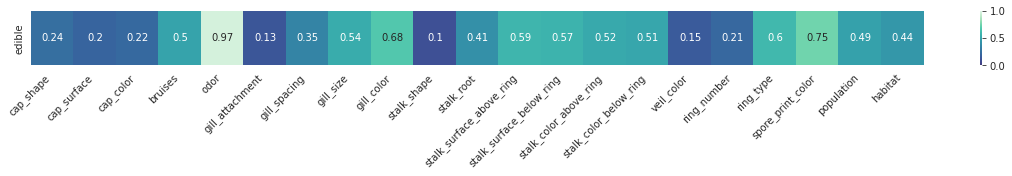

In [ ]:
from collections import OrderedDict
edible_dict = OrderedDict()

for col in mush_fit.columns:
  edible_dict[col] = float(cramers_v(mush_fit[col], mush_fit.edible))

def heatmap_edible(edible_dict):
  edible_df = pd.DataFrame([edible_dict])
  edible_df.drop(columns='edible', inplace=True)
  edible_df.set_index([['edible']*1], inplace=True)

  sns.set_style('darkgrid')

  fig, ax = plt.subplots(figsize=(20, 1))

  ax = sns.heatmap(edible_df, 
                   cmap='mako', 
                  vmin=0, vmax=1, center=0.3, 
                  annot = True 
                  )
  ax.set_xticklabels(ax.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right'
                     ); 
  fig.show()

heatmap_edible(edible_dict)

## Prepare inputs

Let's drop data with correlation <0.2 -> retrieve numpy array -> split target from data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def get_datasets(df):
  #prep_df = df.drop(columns=["cap_surface", "gill_attachment", "stalk_shape", "veil_color","odor", "spore_print_color", "ring_type"])
	labels = ["edible","cap_shape","cap_surface", "cap_color", "gill_color",  "ring_number", "population", "habitat"]
	#labels = ["edible","odor"]
	prep_df = df[labels]
	mush_prep_data = prep_df.values
	X = mush_prep_data[:, 1:].astype(str)
	y = mush_prep_data[:,0]
	y = y.reshape((len(y), -1))
	return X, y, labels

def get_labeled_datasets():
	labels = ["cap_shape","cap_surface", "cap_color", "gill_color",  "ring_number", "population", "habitat"]
	X = mush_df[labels]
	y = mush_df['edible']
		
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
		
	enc_x = OneHotEncoder(sparse=False)
	enc_x.fit(X)
	X_train = pd.DataFrame(enc_x.transform(X_train))
	X_train.columns = enc_x.get_feature_names(labels)
	X_test = pd.DataFrame(enc_x.transform(X_test))
	X_test.columns = enc_x.get_feature_names(labels)


	enc_y = LabelEncoder()
	enc_y.fit(y)
	y_train = pd.DataFrame(enc_y.transform(y_train))
	y_train.columns = ["edible"]
	y_test = pd.DataFrame(enc_y.transform(y_test))
	y_test.columns = ["edible"]

	return X_train, X_test, y_train, y_test

#prepare inputs using OHE
def prepare_inputs(X_train, X_test):
	ohe = OneHotEncoder()
	ohe.fit(X_train)
	X_train_enc = ohe.transform(X_train)
	X_test_enc = ohe.transform(X_test)
	return X_train_enc, X_test_enc, ohe

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [ ]:
##retrieve numpt arrays for inpuy and targets
#X, y, labels = get_datasets(mush_df)
##split datasets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
## prepare input data
#X_train_enc, X_test_enc, encoder = prepare_inputs(X_train, X_test)
## prepare target data
#y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [ ]:
X_train, X_test, y_train, y_test = get_labeled_datasets()

## Models

Let's first create helper functions to visualize the confusion matrix and count accuracy and...

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def predict_and_plot(inputs, targets, name=''):
    preds = list(map(lambda x: 0 if x<0.5 else 1, model.predict(inputs)))
    
    accuracy = accuracy_score(targets, preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix');
    
    return preds

...and to look for better hyperparameteres - check part concerning decision tree

### LOGISTIC REGRESSION

Let's create Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(fit_intercept=True, )
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
preds_train = accuracy_score(model.predict(X_train), y_train)
preds_train

0.922285504317472

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, model.predict(X_train))

0.6886471421095122

Accuracy: 90.19%


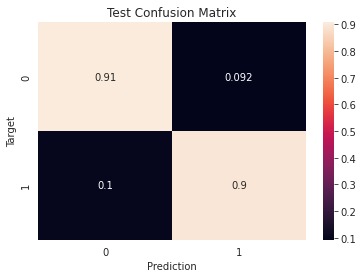

In [ ]:
preds_test = predict_and_plot(X_test, y_test, name = 'Test')


Accuracy values (Linear Regression):

> No tuning : 90.19

### CLASSIFICATION TREE

In [ ]:
 from sklearn import tree

Let's create helper function to find hyperparameters: max_depth & max_leaf_nodes

In [ ]:
# find error
def max_depth_error(md,X_tr, y_tr, X_val, y_val):
    model = tree.DecisionTreeClassifier(max_depth=md, min_samples_split=20 ,random_state=42)
    model.fit(X_tr, y_tr)
    train_acc = 1 - model.score(X_tr, y_tr)
    val_acc = 1 - model.score(X_val, y_val)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

def max_leaf_nodes_error(mln, X_tr, y_tr, X_val, y_val):
    model = tree.DecisionTreeClassifier(max_leaf_nodes=mln, min_samples_split=20 ,random_state=42)
    model.fit(X_tr, y_tr)
    train_acc = 1 - model.score(X_tr, y_tr)
    val_acc = 1 - model.score(X_val, y_val)
    return {'Leafs': mln, 'Training Error': train_acc, 'Validation Error': val_acc}

def plot_errors(errors_df,feature_str):
    sns.set_style("darkgrid")
    plt.figure(figsize=(20,10))
    plt.plot(errors_df[feature_str], errors_df['Training Error'])
    plt.plot(errors_df[feature_str], errors_df['Validation Error'])
    plt.title('Training vs. Validation Error')
    #plt.xticks(range(1,errors_df.last_valid_index()+2, 2))
    plt.xlabel(f'{feature_str}')
    plt.ylabel('Prediction Error (1 - Accuracy)')
    plt.legend(['Training', 'Validation'])

Let's find hyperparameters values

Let's plot errors for max_depth

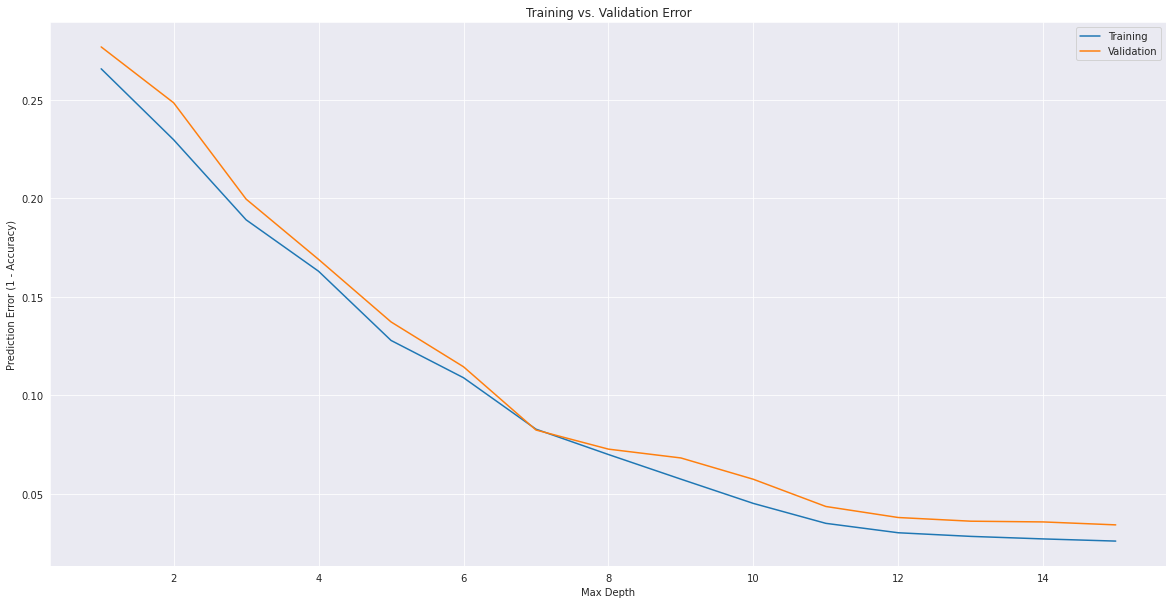

In [ ]:
errors_df = pd.DataFrame([max_depth_error(md, X_train, y_train, X_test, y_test) for md in range(1, 16)])
plot_errors(errors_df, "Max Depth")

Lets plot error for max_leaf

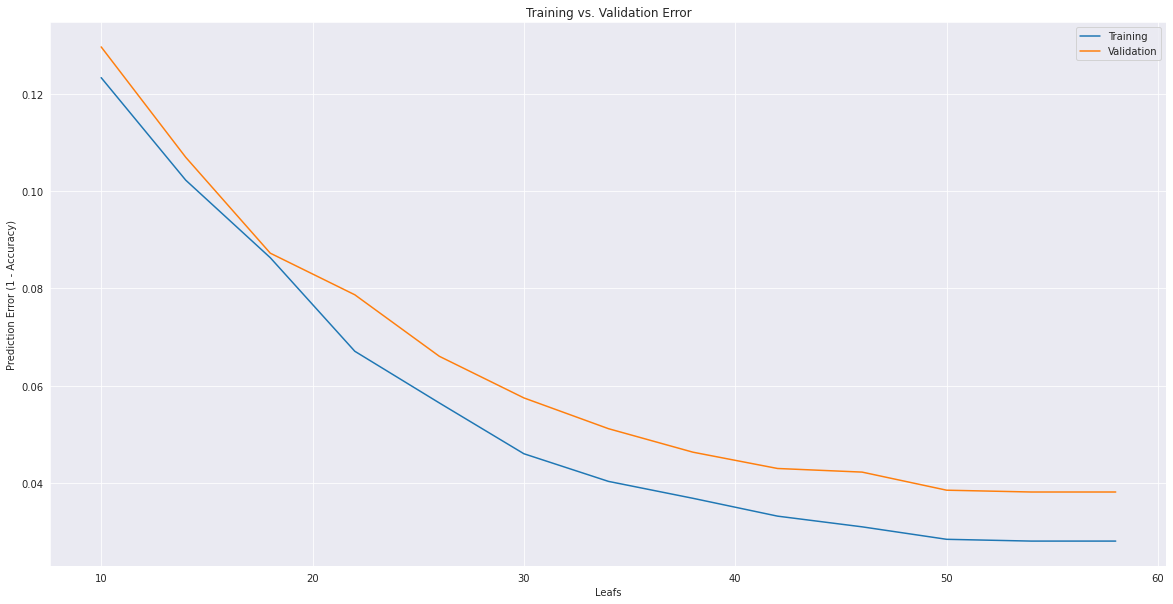

In [ ]:
errors_df = pd.DataFrame([max_leaf_nodes_error(mln, X_train, y_train, X_test, y_test) for mln in range(10,60,4)])
plot_errors(errors_df, "Leafs")

In [ ]:
model = tree.DecisionTreeClassifier(max_leaf_nodes=49, min_samples_split=20, criterion="gini")
model = model.fit(X_train, y_train)
model.get_depth()

15

In [ ]:
preds_train = accuracy_score(model.predict(X_train), y_train)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))

0.7775207821183002

Accuracy: 96.12%


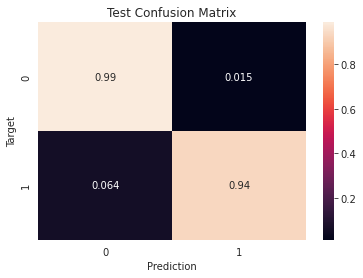

In [ ]:
preds_test = predict_and_plot(X_test, y_test, name = 'Test')

[Ellipsis]

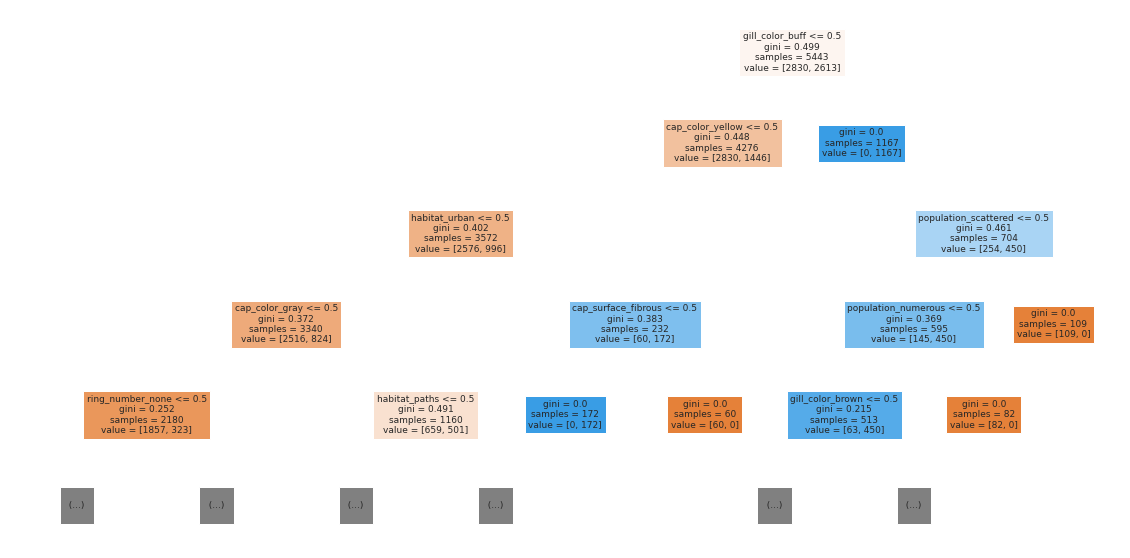

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(model,  max_depth=4, feature_names= X_train.columns, filled=True)
[...]

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Let's create Random Forest

NOTE: n_jobs -1 means that sklearn applies multiprocessing automaticly

In [ ]:
base_model = RandomForestClassifier(n_jobs=-1, random_state=42).fit(X_train, y_train.values.ravel())

Find accuracies of forest without tuning

In [ ]:
base_train_acc = base_model.score(X_train, y_train)
base_test_acc = base_model.score(X_test, y_test)
base_accs = base_train_acc, base_test_acc
base_accs

(0.9759323902259783, 0.9682954121596419)

Let's tune trees in the forest. There is a couple of ways to achieve that. Eg:
* n_estimator - control then number of decision trees in random forest
* max_depth and max_leaf_nodes - this argument are passed into each decision tree, first control how "big" can tree grow, the second says how many leaf nodes a tree can have
* max_features - instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a spli
* min_samples_split and min_samples_leaf - values that constrain creating a new node and leaf
* min_impurity_decrease
* bootstrap, max_samples (in created boostrapped database)
* class_weight - amount of times each prediction was mad by RF

Let's create a helper function to test hyperpameters

In [ ]:
def test_params(i=0, **params):
    model = RandomForestClassifier(random_state=42,class_weight={0: 1.5 , 1: 1}, n_jobs=-1,  max_features=17, max_samples=0.9, max_depth=8 , **params).fit(X_train, y_train.values.ravel())
    return {'hp': i, 'Training Error': (1 - model.score(X_train, y_train))*100, 'Validation Error': (1- model.score(X_test, y_test))*100}

In [ ]:
model.classes_

array([0, 1])

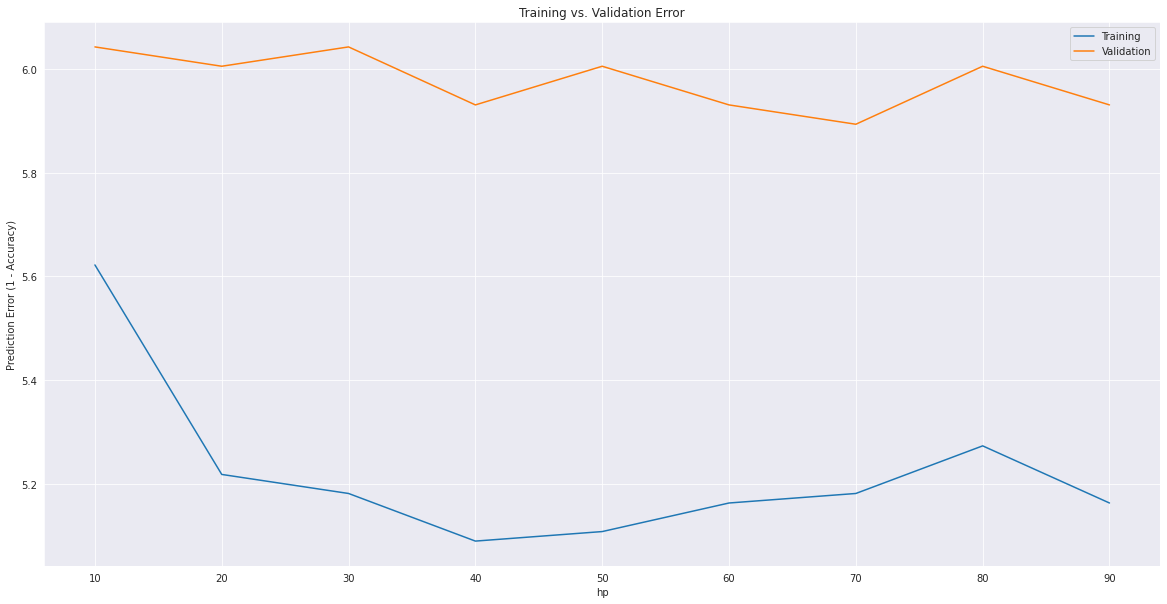

In [ ]:
errors_df = pd.DataFrame([test_params(i=mln, n_estimators=mln) for mln in range(10,100,10)])
plot_errors(errors_df, 'hp')

In [ ]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=70,
                               max_features=17, 
                               max_depth=8,
                               max_samples=0.9,
                               class_weight={0: 1 , 1: 1} 
                               )

In [ ]:
model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 1},
                       criterion='gini', max_depth=8, max_features=17,
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
model.classes_

array([0, 1])

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9518647804519567, 0.9444237224916077)

In [ ]:
base_accs

(0.9759323902259783, 0.9682954121596419)

In [ ]:
r2_score(y_test, model.predict(X_test))

0.7775207821183002

### NN - Keras model

In [ ]:
import keras.models as KM
import keras.layers as KL
from keras.regularizers import l1,l2,l1_l2

In [ ]:
#define the model
model = KM.Sequential()
model.add(KL.Dense(128, input_dim = X_train_enc.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(KL.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1_l2(0.005,0.01)))
model.add(KL.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1_l2(0.005,0.01)))
model.add(KL.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1_l2(0.005,0.01)))
model.add(KL.Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_enc, y_train_enc, epochs=20, batch_size=16, verbose=2)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning:

Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_17/dense_89/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_17/dense_89/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_17/dense_89/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.



341/341 - 1s - loss: 5.6196 - accuracy: 0.8602
Epoch 2/20
341/341 - 1s - loss: 0.5652 - accuracy: 0.9144
Epoch 3/20
341/341 - 1s - loss: 0.3855 - accuracy: 0.9351
Epoch 4/20
341/341 - 1s - loss: 0.3233 - accuracy: 0.9482
Epoch 5/20
341/341 - 1s - loss: 0.2825 - accuracy: 0.9533
Epoch 6/20
341/341 - 1s - loss: 0.2566 - accuracy: 0.9603
Epoch 7/20
341/341 - 1s - loss: 0.2376 - accuracy: 0.9622
Epoch 8/20
341/341 - 1s - loss: 0.2257 - accuracy: 0.9649
Epoch 9/20
341/341 - 1s - loss: 0.2166 - accuracy: 0.9634
Epoch 10/20
341/341 - 1s - loss: 0.2078 - accuracy: 0.9660
Epoch 11/20
341/341 - 1s - loss: 0.1999 - accuracy: 0.9664
Epoch 12/20
341/341 - 1s - loss: 0.1924 - accuracy: 0.9684
Epoch 13/20
341/341 - 1s - loss: 0.1876 - accuracy: 0.9675
Epoch 14/20
341/341 - 1s - loss: 0.1846 - accuracy: 0.9686
Epoch 15/20
341/341 - 1s - loss: 0.1817 - accuracy: 0.9688
Epoch 16/20
341/341 - 1s - loss: 0.1794 - accuracy: 0.9686
Epoch 17/20
341/341 - 1s - loss: 0.1748 - accuracy: 0.9682
Epoch 18/20
341/3

In [ ]:
r2_score(y_train_enc, list(map(lambda x: 0 if x<0.5 else 1, model.predict(X_train_enc))))

0.8807584799568344

Accuracy: 95.45%


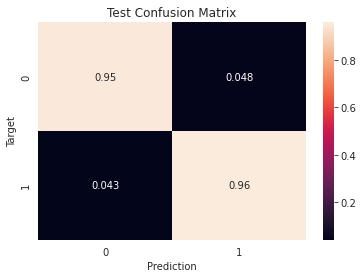

In [ ]:
preds_test = predict_and_plot(X_test_enc, y_test_enc, name = 'Test')

### DUMB MODEL

Lets compare our results to some dumb models and see who is really dumb here

In [ ]:
#random guess
def random_guess(inputs):
  return np.random.choice([0,1], len(inputs))

#all no
def all_no(inputs):
  return np.full(len(inputs), 0)

In [ ]:
#random guess acc
accuracy_score(y_test_enc, random_guess(y_test_enc))

0.5080193957478553

In [ ]:
#random guess acc
accuracy_score(y_test_enc, all_no(y_test_enc))

0.5139873181648639

GOOD, our models are smarter then dumb models :D

## SAVE THE MODEL

In [ ]:
import joblib

In [ ]:
mushroom_class = {
    'model': model,
    'encoder': encoder, 
}

In [ ]:
#joblib.dump(mushroom_class, 'mush_class.joblib')

['mush_class.joblib']

In [ ]:
#model2 = joblib.load('/content/drive/MyDrive/machinlearning/mush_class.joblib')